### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 25th at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx$$

1) What does this integral analytically evaluate to? (Should involve $\sigma$.) Once you work this equation out, we will refer to this equality of the integral and analytic value as EQ1. 

2) Write down the standard form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

3) Manipulate EQ1 such that you can write the integral in terms of a function of $x$ weighted by a normalized half-Gaussian distribution. 

4) Draw $N=10^5$ samples from a $\sigma=2$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your new equation involving a half-Gaussian distribution from (3). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

5) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

6) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

1. $4 \sigma^4$

2.  $ \text{Gaussian: } g(x | \mu=0, \sigma )= \frac{1}{\sqrt{2\pi \sigma^2}} \exp(-\frac{x^2}{2 \sigma^2}) \text{ for } x \in (-\infty, \infty)$

    $\text{Half-Gaussian: } g_{\text{half}}(x|\mu=0, \sigma)= \frac{2}{\sqrt{2\pi \sigma^2}} \exp(-\frac{x^2}{2 \sigma^2}) \text{ for } x \in [0, \infty)$



3. $\exp(-\frac{x^2}{2 \sigma^2})=g_{\text{half}}(x) \frac{\sqrt{2\pi \sigma^2}}{2} \Longrightarrow EQ1= \int_0^\infty x^3 g_{\text{half}}(x) \frac{\sqrt{2\pi \sigma^2}}{2} \,dx \Longrightarrow EQ1= \frac{\sqrt{2\pi \sigma^2}}{2} \int_0^\infty x^3 g_{\text{half}}(x) \,dx$


In [1]:
#Problem 1.4
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from astroML import stats as astroMLstats

#Sampling Normal Distribution
mu=0
sigma=2
distG = scipy.stats.norm(mu, sigma)
norm= distG.rvs(100000)

#Mask negative values
mask = norm > 0
positive = norm[mask]

#Monte Carlo
eq1=  (np.sqrt(2 * np.pi * sigma**2) / 2) * np.mean(positive**3)
real_eq1 = 2*sigma**4
print("Monte Carlo Result:", eq1)
print("Analytical Result:", real_eq1)





Monte Carlo Result: 32.02267978520637
Analytical Result: 32


In [2]:
#Problem 1.5
######################## Functions #############################
#Function that does all of the steps for Problem 1.4
def MonteCarlo(mu, sigma, N):
    distG = scipy.stats.norm(mu, sigma)
    norm= distG.rvs(N)

    #Mask negative values
    mask = norm > 0
    positive = norm[mask]

    #Monte Carlo
    eq1=  (np.sqrt(2 * np.pi * sigma**2) / 2) * np.mean(positive**3)
    return eq1
    

mu=0
sigma=2
N_arr= [10**2, 10**3, 10**4]
batch=100

results = {}
for N in N_arr: #Loops through each N
    mc_values = [] 
    for i in range(batch): #Performs Monte Carlo the number of times equal to the batch size
        mc_values.append(MonteCarlo(mu, sigma, N))
    results[N] = np.array(mc_values)

mean_arr=[]
for N, values in results.items():
    print(f"N = {N}")
    mean_arr.append(np.mean(values))
    print(f"  Mean: {np.mean(values):.4f}")
    print(f"  Std Dev: {np.std(values):.4f}")

print(mean_arr)





N = 100
  Mean: 31.9527
  Std Dev: 12.3728
N = 1000
  Mean: 31.8070
  Std Dev: 3.6049
N = 10000
  Mean: 31.9128
  Std Dev: 0.9586
[np.float64(31.95273267345648), np.float64(31.806955850985005), np.float64(31.9128129477115)]


[np.float64(12.502992490427642), np.float64(22.540832381218188), np.float64(29.96357751291847)]
[np.float64(92.11682616206318), np.float64(42.016451852941096), np.float64(35.04865607148868)]


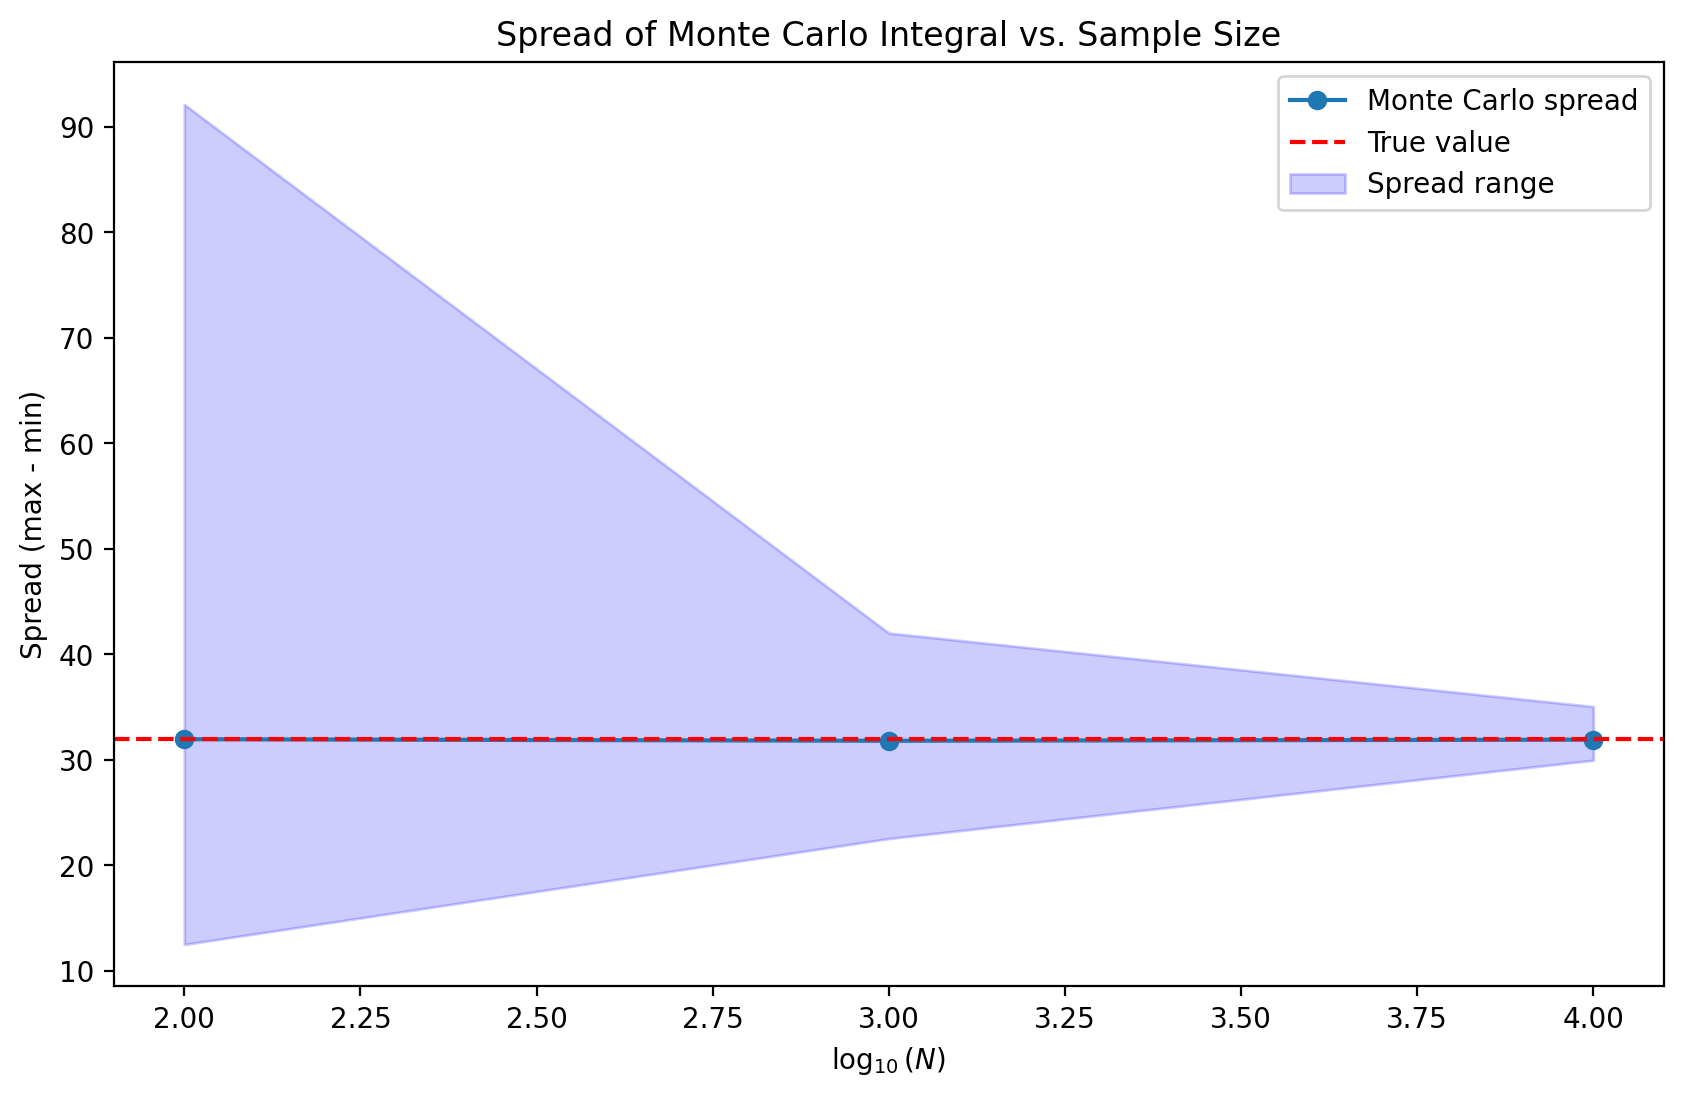

In [3]:
#Problem 1.6
min_arr=[]
max_arr=[]
log_N=[]
for N, values in results.items():
    log_N.append(np.log10(N))
    min_arr.append(np.min(values))
    max_arr.append(np.max(values))
print(min_arr)
print(max_arr)


plt.figure(figsize=(10, 6))
plt.plot(log_N, mean_arr, marker='o', label='Monte Carlo spread')
plt.axhline(real_eq1, color='red', linestyle='--', label='True value')
plt.fill_between(log_N, min_arr, max_arr, alpha=0.2, color='blue', label='Spread range')

# Labels and legend
plt.xlabel(r'$\log_{10}(N)$')
plt.ylabel('Spread (max - min)')
plt.title('Spread of Monte Carlo Integral vs. Sample Size')
plt.legend()
plt.show()

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=150$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^5$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 150? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\ '
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_579650/584380739.py:11: SyntaxWarning: invalid escape sequence '\m'
  label=f'$\mu={mu},\ \sigma={sigma}$');
/tmp/ipykernel_579650/584380739.py:11: SyntaxWarning: invalid escape sequence '\ '
  label=f'$\mu={mu},\ \sigma={sigma}$');


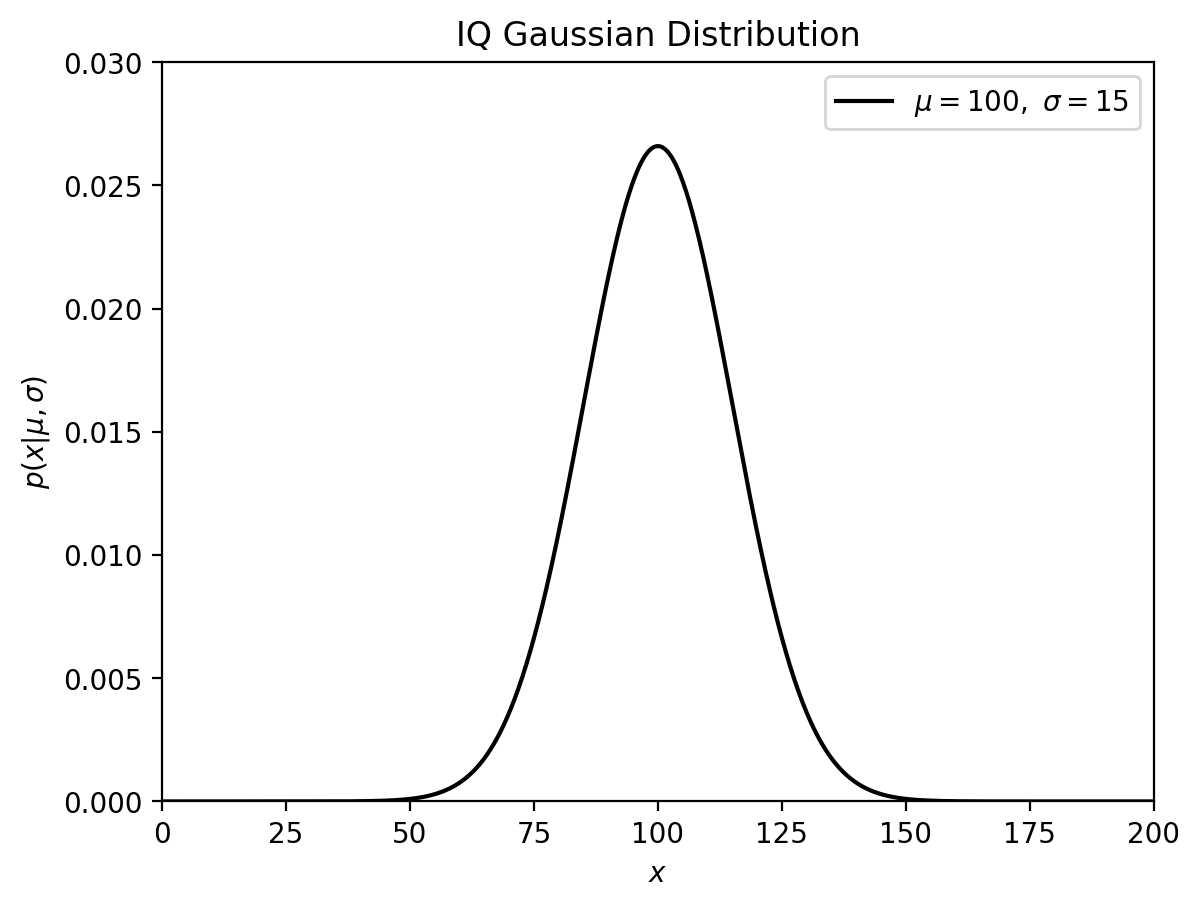

10 random draws: [ 89.64871882 106.70145637 103.81828846  94.0153977  102.77929098
  97.75619526 107.38300565 108.1827426   79.03047388 145.92265915]
pdf= 0.00010281859975274035


In [4]:
#Problem 2.1
mu= 100
sigma =15
N= 10 #Number of draws
xgrid=np.linspace(0,200,1000)
distG = scipy.stats.norm(mu,sigma) # Complete
distribution=distG.pdf(xgrid)

#Plot Distribution
plt.plot(xgrid, distribution, ls='-', c='black', 
         label=f'$\mu={mu},\ \sigma={sigma}$');
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.ylabel(r'$p(x| \mu,\sigma)$')
plt.title('IQ Gaussian Distribution')
plt.legend()
plt.show()


draws = distG.rvs(N) # ten random draws
print("10 random draws:", draws)

pdf= distG.pdf(150) #pdf at x=150
print("pdf=", pdf)

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\ '
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_579650/3134679134.py:19: SyntaxWarning: invalid escape sequence '\m'
  label=f'$\mu={mu},\ \sigma={sigma}$');
/tmp/ipykernel_579650/3134679134.py:19: SyntaxWarning: invalid escape sequence '\ '
  label=f'$\mu={mu},\ \sigma={sigma}$');
/tmp/ipykernel_579650/3134679134.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


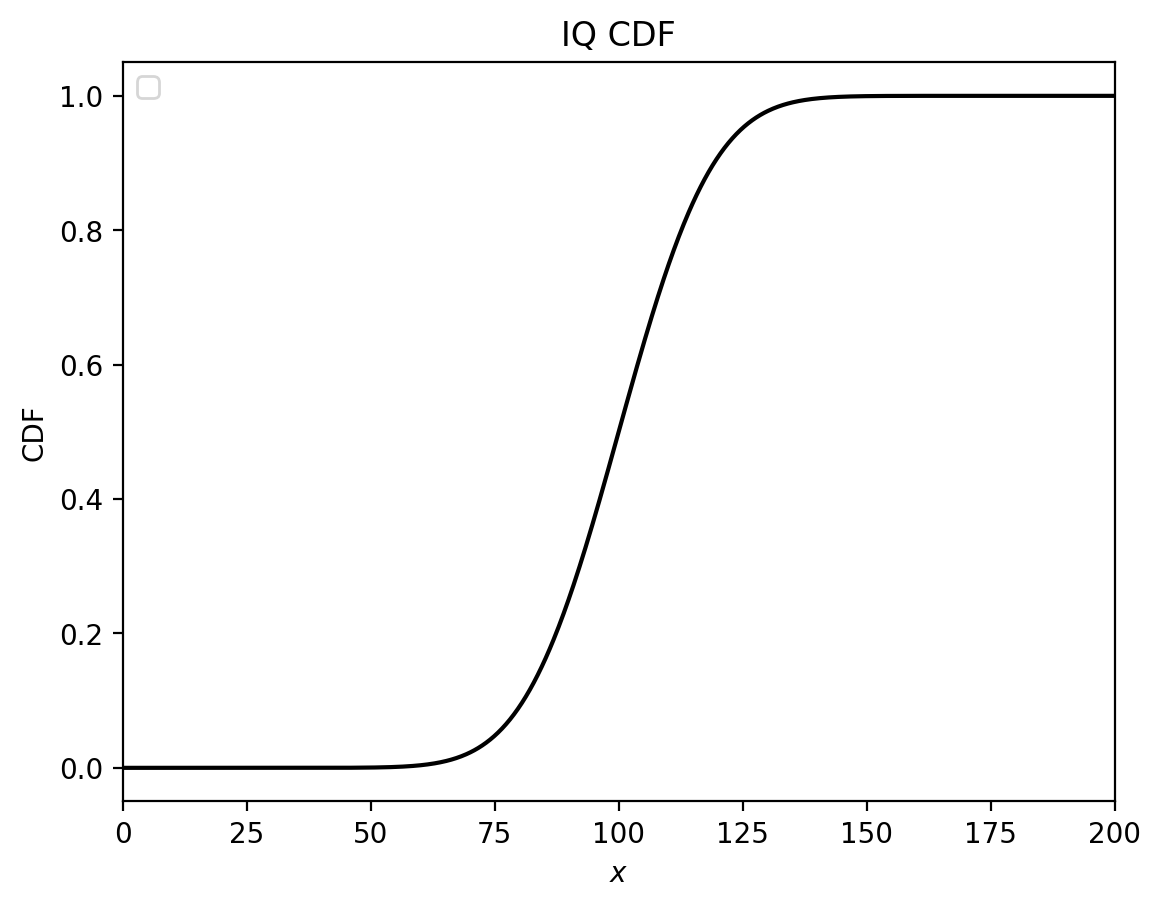

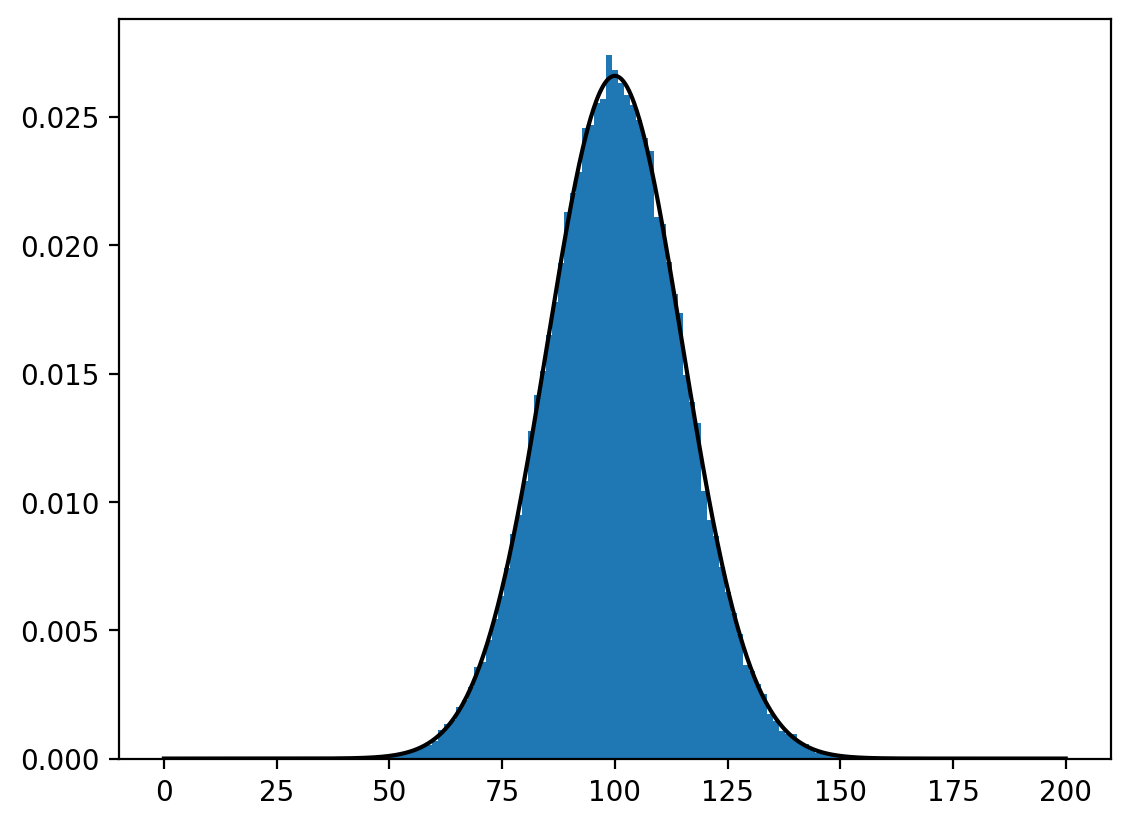

In [5]:
#Problem 2.2

#Plot CDF
cdf= distG.cdf(xgrid)
plt.plot(xgrid, cdf, ls='-', c='black');
plt.xlim(0, 200)
plt.xlabel('$x$')
plt.ylabel(r'CDF')
plt.title('IQ CDF')
plt.legend()
plt.show()

#Inverse Sampling
pgrid=np.random.random(100000)
ppf=distG.ppf(pgrid)

plt.hist(ppf, bins=100, density=True);
plt.plot(xgrid, distribution, ls='-', c='black', 
         label=f'$\mu={mu},\ \sigma={sigma}$');


In [35]:
#Problem 3.3
fraction_150=1-distG.cdf(150)
print(f"Fraction of people with IQ > 150: {np.round(fraction_150*100, 4)}%")

#Problem 3.4
genius= distG.ppf(1-1/(1e6))
guinness= distG.ppf(1/(1e6))
print(f"IQ that corresponds to One in Krillion: {genius} or {guinness}")


Fraction of people with IQ > 150: 0.0429%
IQ that corresponds to One in Krillion: 171.3013646322563 or 28.69863536765652


## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

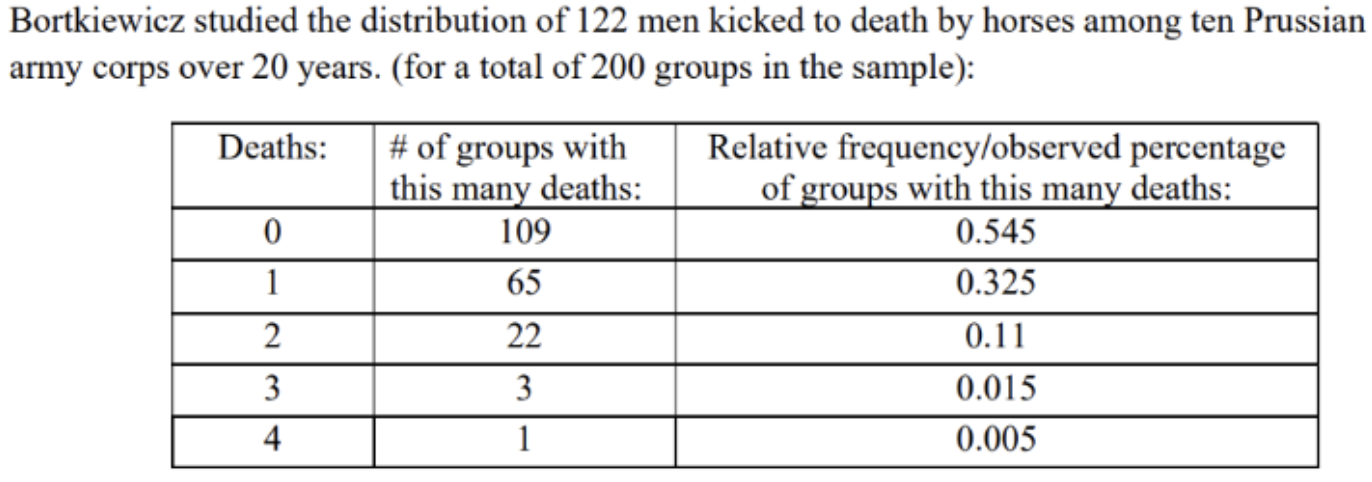

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting soon, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

[7.78800783e-01 1.94700196e-01 2.43375245e-02 2.02812704e-03
 1.26757940e-04]
[0.60653066 0.30326533 0.07581633 0.01263606 0.00157951]
[0.47236655 0.35427491 0.13285309 0.03321327 0.00622749]
[0.36787944 0.36787944 0.18393972 0.06131324 0.01532831]


<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_579650/628672850.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(deaths, pmf, marker='o', linestyle='dashed', label=f"Possion ($\mu = ${mu})");


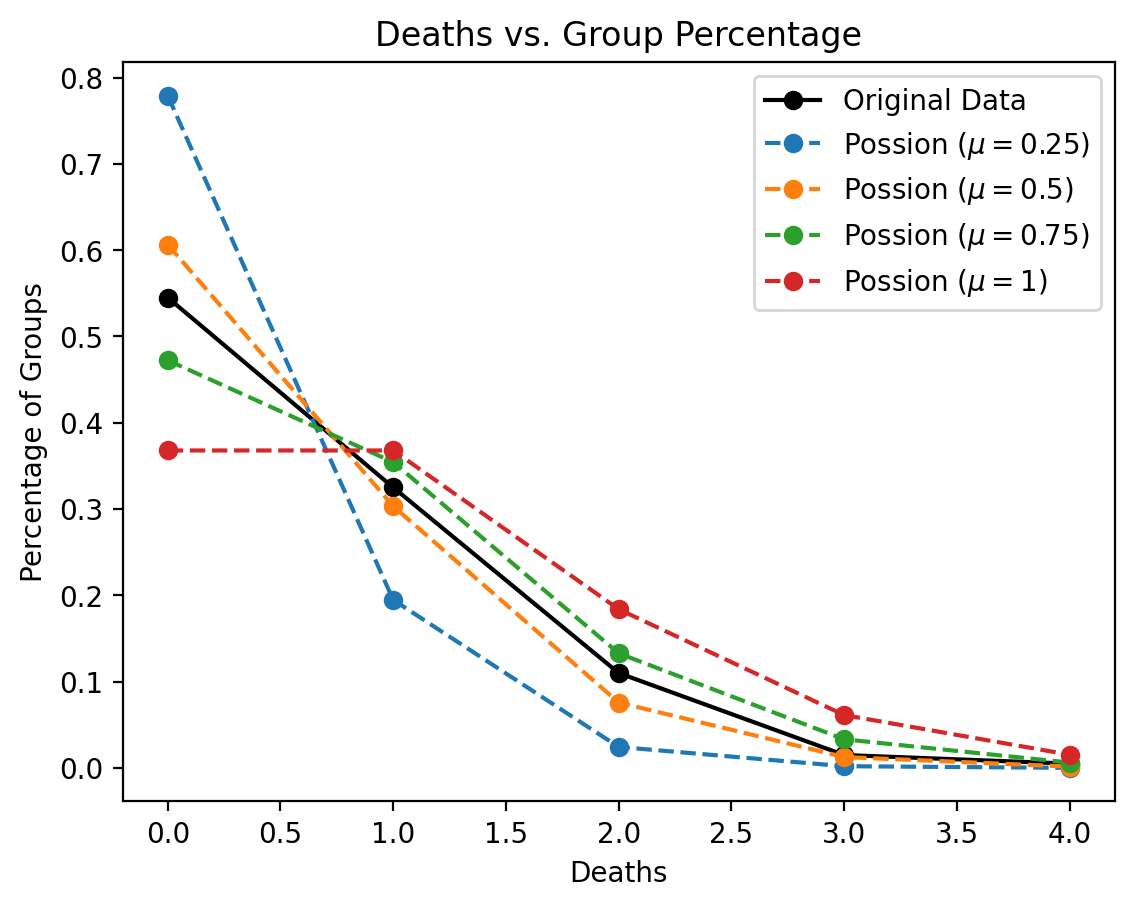

In [22]:
#Problem 3.1
deaths=[0,1,2,3,4]
freq=[0.545, 0.325, 0.11, 0.015, 0.005]

plt.plot(deaths, freq, color="black", marker='o', label="Original Data")

plt.xlabel("Deaths")
plt.ylabel("Percentage of Groups")
plt.title("Deaths vs. Group Percentage");

#Problem 3.2

mu_arr=[0.25, 0.5, 0.75, 1] #Reasonable Guesses for mu
for mu in mu_arr:
    distP= scipy.stats.poisson(mu)
    pmf= distP.pmf(deaths)
    print(pmf)
    plt.plot(deaths, pmf, marker='o', linestyle='dashed', label=f"Possion ($\mu = ${mu})");

plt.legend()
plt.show()

In [17]:
#Problem 3.3
mu= (0*0.545 + 1*0.325 + 2*0.11 + 3*0.015 + 4*0.005)
print(mu)

0.6100000000000001


<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_579650/671458048.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"Poisson Distribution ($\mu =$ {mu} )")


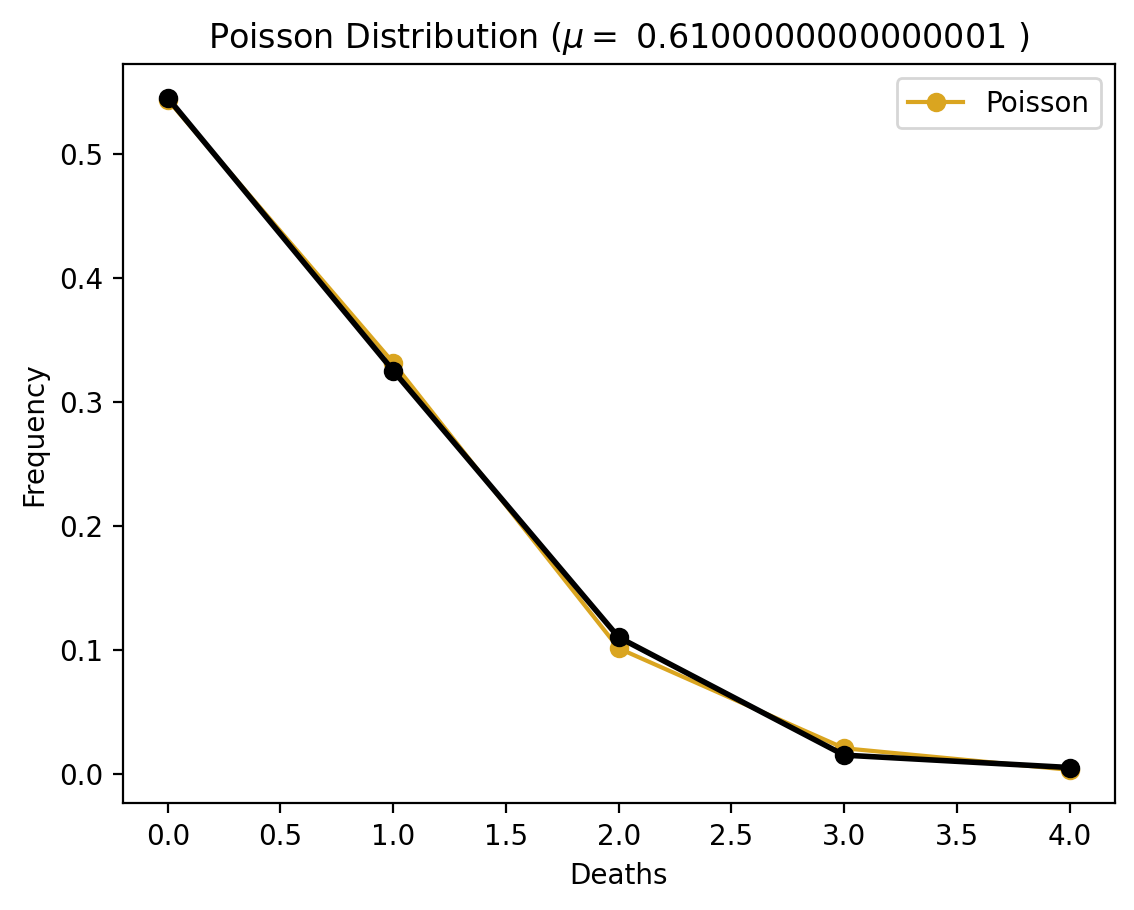

In [18]:
#Problem 3.4
distP= scipy.stats.poisson(mu)
poisson=distP.pmf(deaths)
plt.plot(deaths, poisson, color="goldenrod", marker='o', label="Poisson")

plt.plot(deaths, freq, color="black", marker='o', linewidth=2);
plt.xlabel("Deaths")
plt.ylabel("Frequency")
plt.title(f"Poisson Distribution ($\mu =$ {mu} )")
plt.legend()
plt.show()